# Analysis unit equities

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from utils import cal_annual_return, cal_max_drawdown, gen_price_chart, display_annual_metrics, cal_dividend_rate, get_latest_price, get_initial_price, cal_portfolio_dividend
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## 1. Load unit trust watching list

In [2]:
cols = ["Name", "ISIN", "Fund Type", "Ticker", "Launch Date", "Total Net Assets", "Credit Rating","Dividend Type","Dividend Period", "return","risk"]
df_unittrust_lookup = pd.read_csv("./data/UnitTrust Lookup.csv")
print("SGD UnitTrust")
display(df_unittrust_lookup.loc[df_unittrust_lookup["Currency"]=="SGD",cols])

print("USD UnitTrust")
display(df_unittrust_lookup.loc[df_unittrust_lookup["Currency"]=="USD",cols])

print("JPY UnitTrust")
display(df_unittrust_lookup.loc[df_unittrust_lookup["Currency"]=="JPY",cols])

SGD UnitTrust


,Name,ISIN,Fund Type,Ticker,Launch Date,Total Net Assets,Credit Rating,Dividend Type,Dividend Period,return,risk
0,Amova Japan Dividend Equity Fund - SGD - Hedge...,SG9999010490,Equities,0P0000Z1XG.SI,01 Jul 2013,726.64 M,NaN,Cash,Monthly,****,***
1,Allianz US Equity Fund - SGD - Acc,LU0417517546,Equities,0P0000KWSB.SI,11 Aug 2009,357.60 M,NaN,No,NaN,***,****
2,Fidelity America Fund - SGD - Hedged - Ydis - ...,LU0742534661,Equities,0P0000VOR3.SI,12 Mar 2012,3964.30 M,15.0,Cash,Yearly,*,****
3,Allianz Global Opportunistic Bd - AMg - SGD - ...,LU2014481829,Bonds,0P0001I4B6.SI,01 Aug 2019,1129.64 M,8.0,Unit,Monthly,***,*
4,Fidelity Asian High Yield Fund - SGD - Hedged ...,LU0286669774,Bonds,0P0000N2Z8.SI,01 Aug 2019,1139.61 M,15.0,Unit,Monthly,**,***
5,Allianz Global Floating Rate Notes Plus - SGD ...,LU1846563374,Bonds,0P0001DZID.SI,16 Jul 2018,2484.69 M,12.0,Unit,Monthly,*,*
6,Manulife SGD Income - C - Decumulation - SGD -...,SGXZ20405353,Bonds,0P0001LJPK.SI,24 Feb 2021,NaN,NaN,Cash,Monthly,**,*
7,Fullerton SGD Income - A - SGD - Qdis - Cash,SG9999008411,Bonds,0P0000V29M.SI,05 Jan 2012,838.88 M,NaN,Unit,Quaterly,NaN,NaN
8,Amova Singapore Dividend Equity Fund - SGD - M...,SG9999003826,Equities,0P00006O9U.SI,02 Aug 1999,1834.98 M,NaN,Cash,Monthly,***,***
9,Schroder Singapore Trust - SGD - Qdis - Cash,SG9999000343,Equities,0P00006G0K.SI,01 Feb 1993,1227.58 M,NaN,Cash,Quaterly,****,****


USD UnitTrust


,Name,ISIN,Fund Type,Ticker,Launch Date,Total Net Assets,Credit Rating,Dividend Type,Dividend Period,return,risk
15,Allianz Global Opportunistic Bd - AMg - USD - ...,LU1516272009,Bonds,0P00019B22,01 Dec 2016,878.85 M,8.0,Cash,Monthly,****,*
16,Allianz US Equity Fund - USD - Ydis - Cash,LU0256863811,Equities,0P0000AAAQ,15 Feb 2008,278.93 M,NaN,Cash,Yearly,***,***


JPY UnitTrust


,Name,ISIN,Fund Type,Ticker,Launch Date,Total Net Assets,Credit Rating,Dividend Type,Dividend Period,return,risk
13,PIMCO GIS Income Fund - E - JPY - Hedged - Mdi...,IE000WYGJ8R2,Bonds,0P0001Q9PV.T,22 Dec 2022,16421568.15 M,11.0,Cash,Monthly,NaN,NaN
14,JPM Japan Equity Fund - A - JPY - Acc,LU0235639324,Equities,0P00017N9G.T,11 Jan 2006,578780.24 M,NaN,No,NaN,****,*****


## 2. Load the unit trusts history data 
Downloaded from yfinance 
Use colab to download data from yfinance
yfinance is not supported in Singapore

In [3]:
history_filenames = [
    "./data/unit_trust_history_data-20251114.csv"
]

df_history = pd.DataFrame()
for datafile in history_filenames:
    df = pd.read_csv(datafile, header=[0, 1], index_col=0, parse_dates=True)
    df_history  = pd.concat([df_history, df]) 

df_history.index
# for col in df_history.columns:
#     print(col)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2025-10-31', '2025-11-03', '2025-11-04', '2025-11-05',
               '2025-11-06', '2025-11-07', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13'],
              dtype='datetime64[ns]', name='Date', length=2007, freq=None)

In [4]:
idx = pd.IndexSlice
df = df_history.loc[:, idx[:, "0P0001Q9PV.T"]]
df
start_date = "2024-01-01"
end_date = "2024-12-31"
df = df.loc[start_date:end_date]
idx = df[("Close","0P0001Q9PV.T")].first_valid_index()
df.loc[idx]

Price          Ticker      
Adj Close      0P0001Q9PV.T    829.915405
Capital Gains  0P0001Q9PV.T      0.000000
Close          0P0001Q9PV.T    939.000000
Dividends      0P0001Q9PV.T      0.000000
High           0P0001Q9PV.T    939.000000
Low            0P0001Q9PV.T    939.000000
Open           0P0001Q9PV.T    939.000000
Stock Splits   0P0001Q9PV.T      0.000000
Volume         0P0001Q9PV.T      0.000000
Name: 2024-01-04 00:00:00, dtype: float64

## 3. Load divident history and investment geo distribution
The data need to be manually downloaded from DBS

In [5]:
df_div_hist = pd.DataFrame(columns = ["ISIN", "Date", "Dividend per Unit"])
df_invest_dist = pd.DataFrame(columns = ["ISIN", "country", "ratio"])

for index, row in df_unittrust_lookup.iterrows():    
    ISIN = row["ISIN"]
    # print(row["Total Net Assets"])
    if row["div hist"] == True:
      df_div = pd.read_csv(f"./data/div_hist_{ ISIN }.csv")
      df_div["ISIN"] = row["ISIN"]
      df_div_hist = pd.concat([df_div_hist, df_div], ignore_index=True)

    if row["invest dist"] == True:
      df_inv = pd.read_csv(f"./data/invest_dist_{ ISIN }.csv")
      df_inv["ISIN"] = row["ISIN"]
      df_invest_dist = pd.concat([df_invest_dist, df_inv], ignore_index=True)

df_div_hist.Date = pd.to_datetime(df_div_hist.Date)
df_div_hist.head(5)

,ISIN,Date,Dividend per Unit
0,SG9999010490,2013-08-01,0.004293
1,SG9999010490,2013-09-02,0.004300
2,SG9999010490,2013-10-01,0.004200
3,SG9999010490,2013-11-01,0.004100
4,SG9999010490,2013-12-02,0.004200


In [6]:
df_invest_dist.head(5)

,ISIN,country,ratio
0,SG9999010490,Japan,100.00 %
1,LU0742534661,United States,96.39 %
2,LU0742534661,Ireland,1.58 %
3,LU0742534661,Canada,1.13 %
4,LU0742534661,Netherlands,0.77 %


## 4. Calculate yearly return rate

In [7]:

period = range(2020, 2026)

df_metrics = pd.DataFrame(columns = ["ISIN", "Year", "begin_price", "end_price", "Acc Divident", "Return Rate", "Dividend Rate", "Max Drawdown", "Shape Ratio"])
for index, row in df_unittrust_lookup[["ISIN", "Ticker"]].iterrows():
    for year in period: 
        # print(f"Processing data of { row['ISIN'] }, { year }")
        idx = pd.IndexSlice
        df = df_history.loc[:, idx[:, row["Ticker"]]]
        year_begin, year_end, acc_div, return_rate, shape_ratio = cal_annual_return(df, year)
        df_metrics = pd.concat(
            [df_metrics,
                pd.DataFrame(
                    [
                        [
                            row["ISIN"], 
                            year,                             
                            year_begin, 
                            year_end, 
                            acc_div, 
                            return_rate, 
                            cal_dividend_rate(df, year),
                            cal_max_drawdown(df, year),
                            shape_ratio,
                        ]
                    ], 
                    columns = ["ISIN", "Year", "begin_price", "end_price", "Acc Divident", "Return Rate","Dividend Rate", "Max Drawdown", "Shape Ratio"]
                ) 
            ],
            ignore_index=True               
        )   
        
df_metrics = df_metrics.merge(df_unittrust_lookup[["ISIN", "Name"]], on="ISIN")
df_metrics.head(5)

,ISIN,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio,Name
0,SG9999010490,2020,1.289,1.159,0.0786,-0.039876,0.060978,-0.285865,-0.207928,Amova Japan Dividend Equity Fund - SGD - Hedge...
1,SG9999010490,2021,1.145,1.236,0.0624,0.133974,0.054498,-0.099024,0.96075,Amova Japan Dividend Equity Fund - SGD - Hedge...
2,SG9999010490,2022,1.236,1.24,0.0609,0.052508,0.049272,-0.107336,0.162799,Amova Japan Dividend Equity Fund - SGD - Hedge...
3,SG9999010490,2023,1.24,1.612,0.0720,0.358064,0.058065,-0.071587,2.278509,Amova Japan Dividend Equity Fund - SGD - Hedge...
4,SG9999010490,2024,1.612,1.7735,0.1221,0.175931,0.075744,-0.208864,0.615977,Amova Japan Dividend Equity Fund - SGD - Hedge...


## 5. Draw Charts

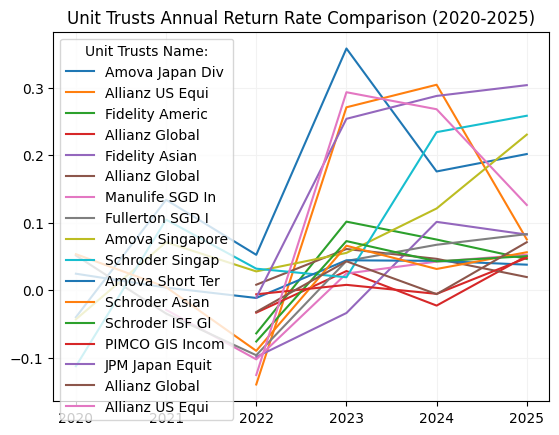

In [8]:
for index, row in df_unittrust_lookup[["ISIN", "Name"]].iterrows():
    plt.plot(df_metrics[df_metrics["ISIN"] == row["ISIN"]]["Year"], df_metrics[df_metrics["ISIN"] == row["ISIN"]]["Return Rate"], label=row["Name"][:15])

plt.title('Unit Trusts Annual Return Rate Comparison (2020-2025)')
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend(title='Unit Trusts Name:')

### 0. Amova Singapore Dividend Equity Fund - SGD - Mdis - Cash

Amova Singapore Dividend Equity Fund - SGD - Mdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
48,2020,1.536,1.39,0.0799,-0.043034,0.052018,-0.305216,-0.221104
49,2021,1.398,1.425,0.0724,0.071102,0.051788,-0.053822,0.708638
50,2022,1.425,1.393,0.0718,0.02793,0.050386,-0.136171,-0.00068
51,2023,1.386,1.393,0.0697,0.055339,0.050289,-0.092553,0.050588
52,2024,1.386,1.4713,0.0826,0.12114,0.059596,-0.064930,0.852779
53,2025,1.4689,1.7368,0.0707,0.230513,0.048131,-0.111276,1.647358


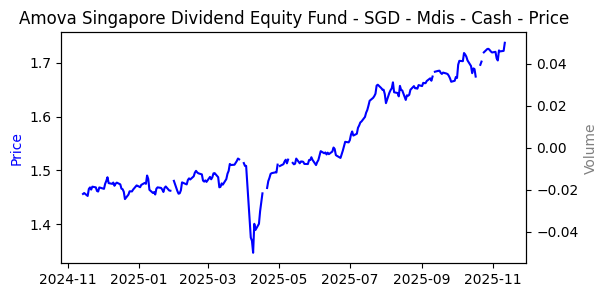

In [9]:
ISIN = "SG9999003826"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 1. Allianz US Equity Fund - SGD - Acc

Allianz US Equity Fund - SGD - Acc


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
6,2020,None,None,0.0,None,None,NaN,None
7,2021,None,None,0.0,None,None,NaN,None
8,2022,30.82,26.52,0.0,-0.13952,0.0,-0.229417,-0.677775
9,2023,26.92,34.214298,0.0,0.270962,0.0,-0.066531,1.712832
10,2024,34.175499,44.576801,0.0,0.30435,0.0,-0.116531,1.697059
11,2025,44.335098,47.672001,0.0,0.075265,0.0,-0.226089,0.188126


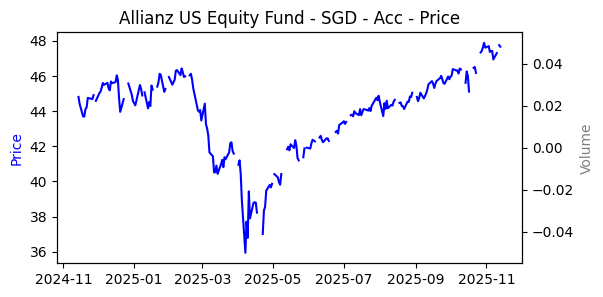

In [10]:
ISIN = "LU0417517546"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 2. Fidelity America Fund - SGD - Hedged - Ydis - Cash

Fidelity America Fund - SGD - Hedged - Ydis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
12,2020,None,None,0.0,None,None,NaN,None
13,2021,None,None,0.0,None,None,NaN,None
14,2022,2.615,2.448,0.0,-0.063862,0.0,-0.186222,-0.49516
15,2023,2.44,2.688,0.0,0.101639,0.0,-0.116359,0.422369
16,2024,2.663,2.863,0.0,0.075103,0.0,-0.070404,0.270709
17,2025,2.874,3.007,0.0,0.046277,0.0,-0.168667,0.061831


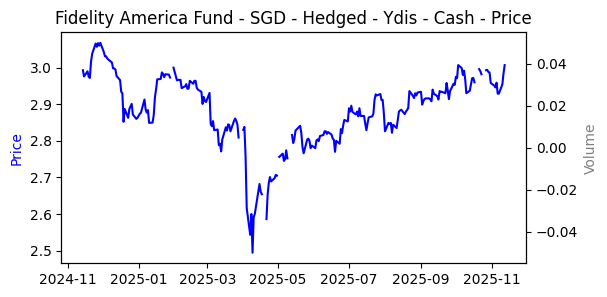

In [11]:
ISIN = "LU0742534661"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

In [12]:
ticker = df_unittrust_lookup[df_unittrust_lookup["ISIN"]=="LU0742534661"]["Ticker"].values[0]
df_history.loc[df_history[("Dividends", ticker)]!=0, ("Dividends", ticker)].dropna()

Series([], Name: (Dividends, 0P0000VOR3.SI), dtype: float64)

### 3. Allianz Global Opportunistic Bd - AMg - SGD - Hedged - Mdis - Unit

Allianz Global Opportunistic Bd - AMg - SGD - Hedged - Mdis - Unit


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
18,2020,None,None,0.00000,None,None,NaN,None
19,2021,None,None,0.00000,None,None,NaN,None
20,2022,9.36,8.72,0.33000,-0.03312,0.035256,-0.085631,-1.199728
21,2023,8.71,8.5607,0.39700,0.028439,0.04558,-0.065380,-0.425431
22,2024,8.548,8.0029,0.35115,-0.02269,0.04108,-0.037337,-1.689228
23,2025,8.0037,8.1292,0.28073,0.050755,0.035075,-0.023187,0.363749


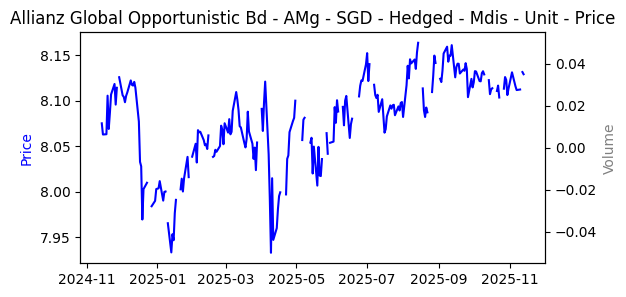

In [13]:
ISIN = "LU2014481829"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 4. Fidelity Asian High Yield Fund - SGD - Hedged - Mdis - Unit

Fidelity Asian High Yield Fund - SGD - Hedged - Mdis - Unit


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
24,2020,None,None,0.0000,None,None,NaN,None
25,2021,None,None,0.0000,None,None,NaN,None
26,2022,0.579,0.499,0.0228,-0.098791,0.039378,-0.390718,-0.715767
27,2023,0.502,0.461,0.0241,-0.033665,0.048008,-0.185903,-0.993819
28,2024,0.46,0.481,0.0256,0.101304,0.055652,-0.016837,1.313522
29,2025,0.479,0.494,0.0245,0.082463,0.051148,-0.065082,0.727388


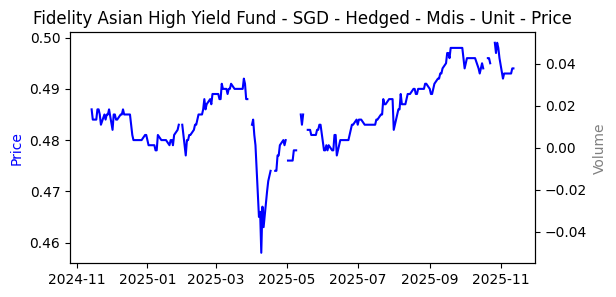

In [14]:
ISIN = "LU0286669774"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 5. Allianz Global Floating Rate Notes Plus - SGD - Hedged - Mdis - Unit

Allianz Global Floating Rate Notes Plus - SGD - Hedged - Mdis - Unit


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
30,2020,None,None,0.00000,None,None,NaN,None
31,2021,None,None,0.00000,None,None,NaN,None
32,2022,9.34,9.18,0.23658,0.008199,0.02533,-0.019119,-1.395055
33,2023,9.18,9.2705,0.47035,0.061095,0.051236,-0.012790,0.778611
34,2024,9.2697,9.2531,0.44814,0.046554,0.048345,-0.004526,-0.043737
35,2025,9.2539,9.0977,0.33710,0.019549,0.036428,-0.004353,-2.474298


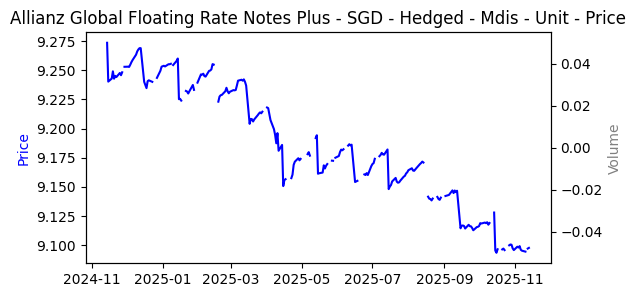

In [15]:
ISIN = "LU1846563374"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 6. Manulife SGD Income - C - Decumulation - SGD - Mdis - Cash

Manulife SGD Income - C - Decumulation - SGD - Mdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
36,2020,None,None,0.000000,None,None,NaN,None
37,2021,1.0,0.913,0.058110,-0.02889,0.05811,-0.057884,-0.960725
38,2022,0.914,0.772,0.048495,-0.102303,0.053058,-0.181439,-2.483424
39,2023,0.774,0.747,0.046155,0.024748,0.059632,-0.060736,-0.758621
40,2024,0.747,0.734,0.044690,0.042423,0.059826,-0.012536,-0.240119
41,2025,0.734,0.736,0.036615,0.052609,0.049884,-0.022285,0.6569


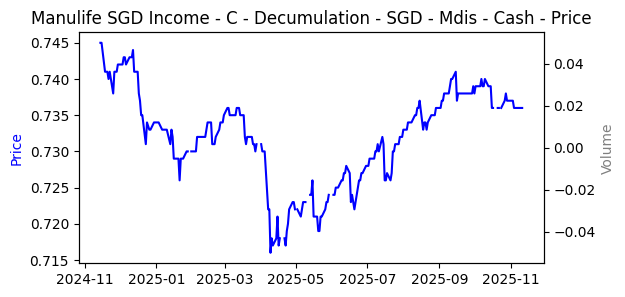

In [16]:
ISIN = "SGXZ20405353"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 7. Fullerton SGD Income - A - SGD - Qdis - Cash

Fullerton SGD Income - A - SGD - Qdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
42,2020,1.09447,1.11086,0.0400,0.051523,0.036547,-0.122546,0.640017
43,2021,1.10241,1.02442,0.0400,-0.034461,0.036284,-0.063339,-1.414981
44,2022,1.0139,0.87835,0.0380,-0.096213,0.037479,-0.135856,-5.449363
45,2023,0.87092,0.87011,0.0386,0.043391,0.044321,-0.030593,-0.460314
46,2024,0.85962,0.87413,0.0434,0.067367,0.050487,-0.006989,1.825742
47,2025,0.86339,0.89138,0.0438,0.083149,0.05073,-0.022878,2.360372


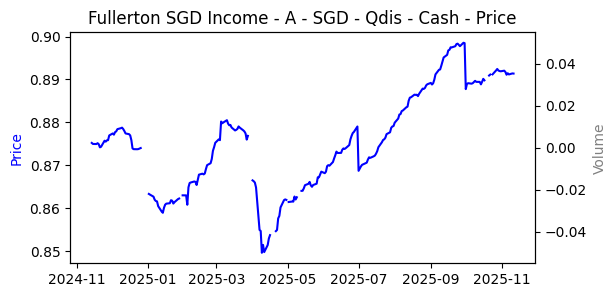

In [17]:
ISIN = "SG9999008411"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 8. Amova Singapore Dividend Equity Fund - SGD - Mdis - Cash

Amova Singapore Dividend Equity Fund - SGD - Mdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
48,2020,1.536,1.39,0.0799,-0.043034,0.052018,-0.305216,-0.221104
49,2021,1.398,1.425,0.0724,0.071102,0.051788,-0.053822,0.708638
50,2022,1.425,1.393,0.0718,0.02793,0.050386,-0.136171,-0.00068
51,2023,1.386,1.393,0.0697,0.055339,0.050289,-0.092553,0.050588
52,2024,1.386,1.4713,0.0826,0.12114,0.059596,-0.064930,0.852779
53,2025,1.4689,1.7368,0.0707,0.230513,0.048131,-0.111276,1.647358


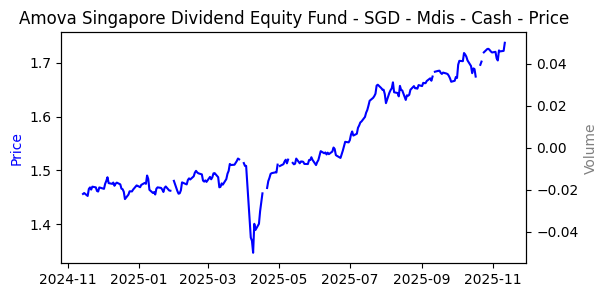

In [18]:
ISIN = "SG9999003826"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 9. Schroder Singapore Trust - SGD - Qdis - Cash

Schroder Singapore Trust - SGD - Qdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
54,2020,1.63,1.39,0.056581,-0.112527,0.034712,-0.323182,-0.513937
55,2021,1.401,1.488,0.059535,0.104593,0.042495,-0.064952,0.96218
56,2022,1.494,1.481,0.060778,0.03198,0.040681,-0.127500,0.035212
57,2023,1.478,1.448,0.058456,0.019253,0.039551,-0.077381,-0.332954
58,2024,1.44,1.718,0.059207,0.234172,0.041116,-0.080511,1.836571
59,2025,1.721,2.094,0.071794,0.258451,0.041716,-0.141312,1.62121


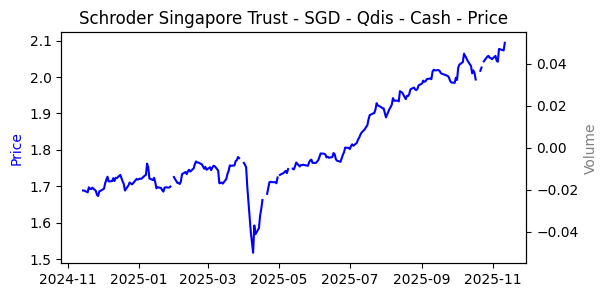

In [19]:
ISIN = "SG9999000343"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 10. Amova Short Term Bond Fund (S$) - SGD - Cash

Amova Short Term Bond Fund (S$) - SGD - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
60,2020,1.55124,1.58928,0.0,0.024522,0.0,-0.023621,2.072535
61,2021,1.58984,1.59617,0.0,0.003981,0.0,-0.007169,0.536033
62,2022,1.59596,1.57777,0.0,-0.011398,0.0,-0.025099,-4.248446
63,2023,1.57865,1.64873,0.0,0.044392,0.0,-0.002469,-0.744344
64,2024,1.64841,1.72016,0.0,0.043527,0.0,-0.001821,-0.532915
65,2025,1.72038,1.78558,0.0,0.037899,0.0,-0.003116,0.145181


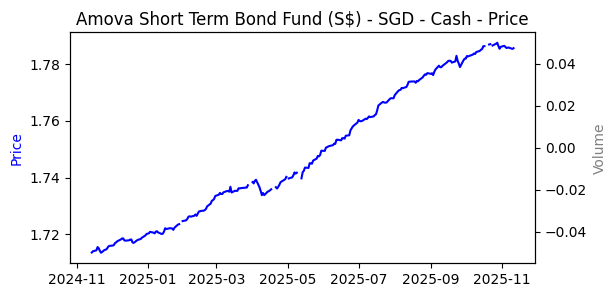

In [20]:
ISIN = "SG9999004212"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 11. Schroder Asian Investment Grade Credit - SGD - Qdis - Unit

Schroder Asian Investment Grade Credit - SGD - Qdis - Unit


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
66,2020,0.864,0.88,0.030206,0.053479,0.034961,-0.094972,0.985612
67,2021,0.875,0.852,0.027065,0.004646,0.030931,-0.024648,0.144454
68,2022,0.838,0.735,0.027833,-0.089698,0.033214,-0.149259,-2.688486
69,2023,0.728,0.741,0.035007,0.065944,0.048087,-0.048534,0.317018
70,2024,0.737,0.727,0.033234,0.031525,0.045094,-0.024291,-0.481658
71,2025,0.725,0.734,0.031830,0.056317,0.043903,-0.028853,0.623161


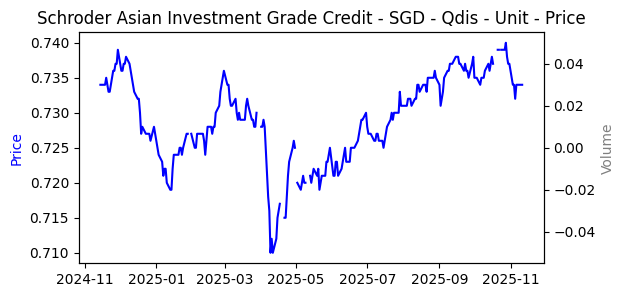

In [21]:
ISIN = "SG9999003446"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 12. Schroder ISF Global Credit Income - A - SGD - Hedged - Mdis - Cash

Schroder ISF Global Credit Income - A - SGD - Hedged - Mdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
72,2020,None,None,0.000000,None,None,NaN,None
73,2021,None,None,0.000000,None,None,NaN,None
74,2022,130.872406,116.587799,4.354155,-0.075879,0.03327,-0.140097,-1.777248
75,2023,116.932899,119.448402,5.997636,0.072804,0.051291,-0.043672,0.471894
76,2024,119.182404,117.429802,6.852576,0.042791,0.057497,-0.017186,-0.148419
77,2025,117.486603,117.7603,5.663521,0.050535,0.048206,-0.025244,0.478225


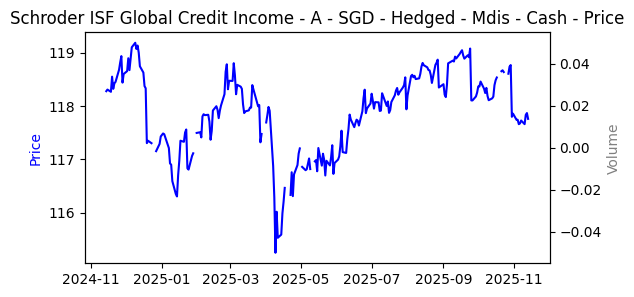

In [22]:
ISIN = "LU1514168886"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 13. PIMCO GIS Income Fund - E - JPY - Hedged - Mdis - Cash

PIMCO GIS Income Fund - E - JPY - Hedged - Mdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
78,2020,None,None,0.0,None,None,NaN,None
79,2021,None,None,0.0,None,None,NaN,None
80,2022,998.0,992.0,0.0,-0.006012,0.0,-0.006012,-0.935397
81,2023,998.0,946.0,60.0,0.008016,0.06012,-0.076831,-0.825375
82,2024,939.0,874.0,60.0,-0.005325,0.063898,-0.029622,-1.494088
83,2025,875.0,867.0,50.0,0.048,0.057143,-0.027335,0.283941


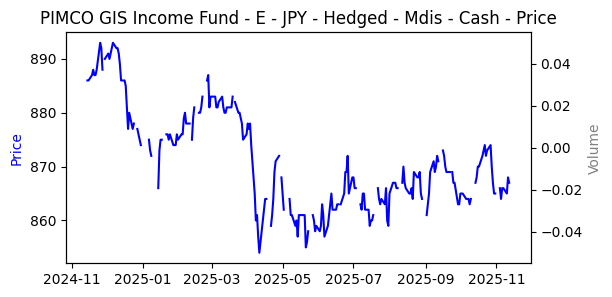

In [23]:
ISIN = "IE000WYGJ8R2"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 14. JPM Japan Equity Fund - A - JPY - Acc

JPM Japan Equity Fund - A - JPY - Acc


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
84,2020,None,None,0.0,None,None,NaN,None
85,2021,None,None,0.0,None,None,NaN,None
86,2022,16400.0,16220.0,0.0,-0.010976,0.0,-0.169455,-0.180922
87,2023,16112.0,20203.0,0.0,0.25391,0.0,-0.100069,1.362571
88,2024,20296.0,26137.0,0.0,0.287791,0.0,-0.235057,1.039339
89,2025,25831.0,33678.0,0.0,0.303782,0.0,-0.194750,1.115494


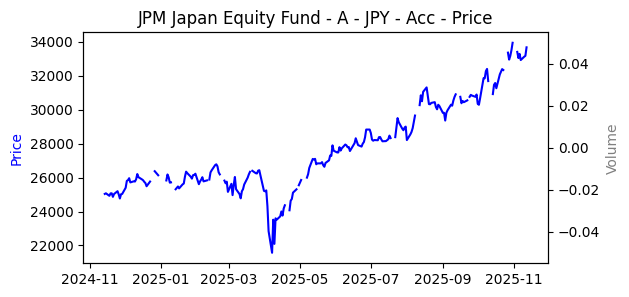

In [24]:
# print(df_metrics[df_metrics["ISIN"] == "LU0235639324"]["Name"].unique()[0])
# df_metrics[df_metrics["ISIN"] == "LU0235639324"]
ISIN = "LU0235639324"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 15. Allianz Global Opportunistic Bd - AMg - USD - Mdis - Cash

Allianz Global Opportunistic Bd - AMg - USD - Mdis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
90,2020,None,None,0.00000,None,None,NaN,None
91,2021,None,None,0.00000,None,None,NaN,None
92,2022,9.35,8.72,0.33000,-0.032086,0.035294,-0.081365,-1.133653
93,2023,8.72,8.6622,0.43200,0.042913,0.049541,-0.059226,-0.150122
94,2024,8.6496,8.1528,0.44700,-0.005758,0.051679,-0.033232,-1.265318
95,2025,8.1688,8.3572,0.39313,0.071189,0.048126,-0.023224,0.890059


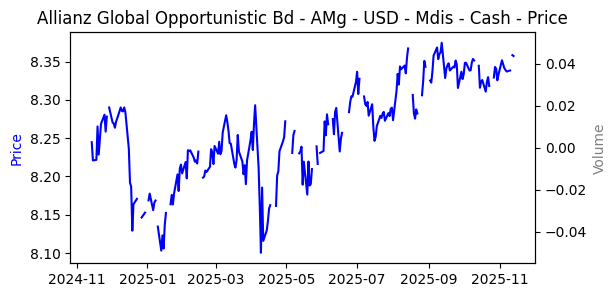

In [35]:
ISIN = "LU1516272009"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

### 16. Allianz US Equity Fund - USD - Ydis - Cash

Allianz US Equity Fund - USD - Ydis - Cash


,Year,begin_price,end_price,Acc Divident,Return Rate,Dividend Rate,Max Drawdown,Shape Ratio
96,2020,None,None,0.000,None,None,NaN,None
97,2021,None,None,0.000,None,None,NaN,None
98,2022,25.74,22.51,0.000,-0.125486,0.0,-0.258008,-0.567014
99,2023,22.809999,29.091801,0.408,0.293284,0.017887,-0.079053,1.786574
100,2024,29.0163,36.328999,0.466,0.26808,0.01606,-0.098640,1.568288
101,2025,36.109798,40.669899,0.000,0.126284,0.0,-0.223935,0.4331


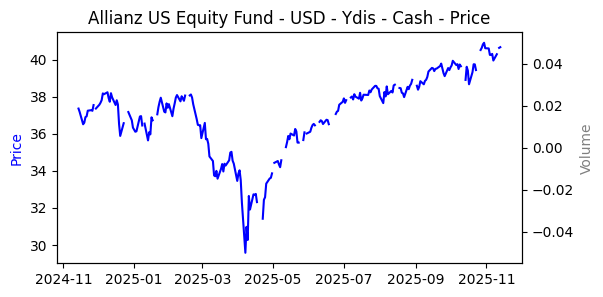

In [26]:
ISIN = "LU0256863811"
display_annual_metrics(df_metrics, ISIN)
gen_price_chart(df_history, df_unittrust_lookup, ISIN, period="1y")

## 6. Summary

In [27]:
this_year = datetime.today().year
for index, row in df_unittrust_lookup[["ISIN", "Ticker"]].iterrows(): 
    df_unittrust_lookup.loc[df_unittrust_lookup["ISIN"]==row["ISIN"], "5YearRet"] = df_metrics.loc[(df_metrics["ISIN"]==row["ISIN"])&(df_metrics["Year"] > (this_year-5)),"Return Rate"].mean()
    df_unittrust_lookup.loc[df_unittrust_lookup["ISIN"]==row["ISIN"], "3YearRet"] = df_metrics.loc[(df_metrics["ISIN"]==row["ISIN"])&(df_metrics["Year"] > (this_year-3)),"Return Rate"].mean()
    df_unittrust_lookup.loc[df_unittrust_lookup["ISIN"]==row["ISIN"], "YTDRet"] = df_metrics.loc[(df_metrics["ISIN"]==row["ISIN"])&(df_metrics["Year"] == this_year),"Return Rate"].mean()

display(df_unittrust_lookup[["Name", "ISIN", "Fund Type", "5YearRet", "3YearRet","YTDRet","Fund Type","return","risk"]])

,Name,ISIN,Fund Type,5YearRet,3YearRet,YTDRet,Fund Type,return,risk
0,Amova Japan Dividend Equity Fund - SGD - Hedge...,SG9999010490,Equities,0.184445,0.245248,0.201748,Equities,****,***
1,Allianz US Equity Fund - SGD - Acc,LU0417517546,Equities,0.127764,0.216859,0.075265,Equities,***,****
2,Fidelity America Fund - SGD - Hedged - Ydis - ...,LU0742534661,Equities,0.039789,0.074340,0.046277,Equities,*,****
3,Allianz Global Opportunistic Bd - AMg - SGD - ...,LU2014481829,Bonds,0.005846,0.018835,0.050755,Bonds,***,*
4,Fidelity Asian High Yield Fund - SGD - Hedged ...,LU0286669774,Bonds,0.012828,0.050034,0.082463,Bonds,**,***
5,Allianz Global Floating Rate Notes Plus - SGD ...,LU1846563374,Bonds,0.033849,0.042399,0.019549,Bonds,*,*
6,Manulife SGD Income - C - Decumulation - SGD -...,SGXZ20405353,Bonds,-0.002283,0.039927,0.052609,Bonds,**,*
7,Fullerton SGD Income - A - SGD - Qdis - Cash,SG9999008411,Bonds,0.012647,0.064636,0.083149,Bonds,NaN,NaN
8,Amova Singapore Dividend Equity Fund - SGD - M...,SG9999003826,Equities,0.101205,0.135664,0.230513,Equities,***,***
9,Schroder Singapore Trust - SGD - Qdis - Cash,SG9999000343,Equities,0.129690,0.170625,0.258451,Equities,****,****


## 7. Portfolio analysis 

In [28]:
def cal_portfolio_value(portfolio, df_unittrust_lookup, df_history):
    total_value = 0
    for trust in portfolio:
        ticker = df_unittrust_lookup.loc[df_unittrust_lookup["ISIN"]==trust["ISIN"]]["Ticker"].values[0]
        idx = pd.IndexSlice
        total_value += get_latest_price(df_history.loc[:, idx[:, ticker]],2025) * trust["unit"]
    return total_value

In [29]:
portfolio_usd = [
    {"ISIN":"LU1516272009","unit":594.818},
    {"ISIN":"LU0256863811","unit":124.133}
]
portfolio_jpy = [
    {"ISIN":"LU0235639324","unit":34.63},
]
portfolio_sgd = [
    {"ISIN":"SG9999010490","unit":4110.75},
    {"ISIN":"LU0417517546","unit":268.031}
]
total_trust_value_usd = cal_portfolio_value(portfolio_usd, df_unittrust_lookup, df_history)
total_dividend_usd = cal_portfolio_dividend(portfolio_usd, df_unittrust_lookup, df_history, df_metrics)
print(f"USD portfolio cost: {total_trust_value_usd:.2f}, yearly dividend: {total_dividend_usd:.2f}")

total_trust_value_jpy = cal_portfolio_value(portfolio_jpy, df_unittrust_lookup, df_history)
total_dividend_jpy = cal_portfolio_dividend(portfolio_jpy, df_unittrust_lookup, df_history, df_metrics)
print(f"JPY portfolio cost: {total_trust_value_jpy:.2f}, yearly dividend: {total_dividend_jpy:.2f}")

total_trust_value_sgd = cal_portfolio_value(portfolio_sgd, df_unittrust_lookup, df_history)
total_dividend_sgd = cal_portfolio_dividend(portfolio_sgd, df_unittrust_lookup, df_history, df_metrics)
print(f"SGD portfolio cost: {total_trust_value_sgd:.2f}, yearly dividend: {total_dividend_sgd:.2f}")

USD portfolio cost: 10019.49, yearly dividend: 337.97
JPY portfolio cost: 1166269.14, yearly dividend: 0.00
SGD portfolio cost: 21066.08, yearly dividend: 627.81


In [30]:
usd_sgd = 1.3
jpy_sgd = 0.0084

total_value = total_trust_value_usd*usd_sgd + total_trust_value_jpy*jpy_sgd + total_trust_value_sgd
total_dividend = total_dividend_usd*usd_sgd +total_dividend_jpy*jpy_sgd + total_dividend_sgd

print(f"SGD total cost: {total_value:.2f}, yearly dividend: {total_dividend:.2f}, dividend rate: {total_dividend/total_value:.2f}")

SGD total cost: 43888.08, yearly dividend: 1067.17, dividend rate: 0.02
